In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#Leitura do arquivo
df = pd.read_csv('Argos_UK_Scraped_Product_Info-Batch2.csv', delimiter=',', encoding='mac_roman', index_col=[0])

In [3]:
# Primeiras 5 linhas
df.head()

,Category,Sub-Cateogry,Product Type,Product Line,Product Line Item,Product Price,EAN Code
0,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Simone 2 + 2 Drawer Rattan Chest,£230.00,NaN
1,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Kirk 3 Drawer Chest - Oak,£295.00,NaN
2,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Kirk 3 Drawer Chest - Oak,£295.00,NaN
3,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Kirk 3 Drawer Chest - Walnut,£295.00,NaN
4,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Simone 2 + 2 Wide Drawer Rattan Chest,£300.00,NaN


In [4]:
# Últimas 5 linhas
df.tail()

,Category,Sub-Cateogry,Product Type,Product Line,Product Line Item,Product Price,EAN Code
6749,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted Large White & Mirror Sliding W...,£450.00,NaN
6750,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted Large Mirror Sliding Wardrobe ...,£450.00,NaN
6751,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted White Extra Large Wardrobe,£450.00,NaN
6752,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted White Extra Large Wardrobe,£450.00,NaN
6753,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted Extra Large Wardrobe - Oak Effect,£450.00,NaN


In [5]:
# Tratamento do nome da coluna Sub Category
df = df.rename(columns= {'Sub-Cateogry':'Sub-Category'})

In [6]:
# Comprimento do CSV
len(df)

6754

In [7]:
#tratamento da coluna de valores, remoção do sifrão de cada linha
df['Product Price'] = df['Product Price'].str.replace('£','')
#Remoção de códigos aos valores da coluna
df['Product Price'] = np.where(
    df['Product Price'].str.contains('cxdAxO') | df['Product Price'].str.contains('hBIIXv') | df['Product Price'].str.contains('iJATTi') \
        ,df['Product Price'].str[0:6], df['Product Price'])
df['Product Price'] = df['Product Price'].astype(float)


In [8]:
df['Product Price'] = round(df['Product Price'],2)

In [9]:
# Soma dos valores Nulos de cada coluna
df.isnull().sum()

Category                0
Sub-Category            0
Product Type            0
Product Line         5987
Product Line Item       0
Product Price           0
EAN Code             3677
dtype: int64

In [10]:
# Valores Nulos em porcentual de cada coluna
df.isnull().sum()/len(df)*100

Category              0.000000
Sub-Category          0.000000
Product Type          0.000000
Product Line         88.643767
Product Line Item     0.000000
Product Price         0.000000
EAN Code             54.441812
dtype: float64

In [11]:
# Descrição da coluna quantitativa do CSV
df['Product Price'].describe()

count    6754.000000
mean      286.741965
std       433.628950
min         2.000000
25%        30.000000
50%       120.000000
75%       320.000000
max      3999.000000
Name: Product Price, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6754 entries, 0 to 6753
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           6754 non-null   object 
 1   Sub-Category       6754 non-null   object 
 2   Product Type       6754 non-null   object 
 3   Product Line       767 non-null    object 
 4   Product Line Item  6754 non-null   object 
 5   Product Price      6754 non-null   float64
 6   EAN Code           3077 non-null   object 
dtypes: float64(1), object(6)
memory usage: 422.1+ KB


In [13]:
df = df.drop(columns = 'EAN Code')
df = df.drop(columns = 'Product Line')

In [14]:
Category = df['Category'].unique()
for row in Category:
  print(row)

Home and furniture
Home
Baby and nursery
Gifts
Garden and DIY
Sports and leisure
Clothing
Technology
Appliances


In [15]:
group_cat = df.groupby(['Category','Sub-Category'])['Product Price'].unique().explode().reset_index()
group_cat

,Category,Sub-Category,Product Price
0,Appliances,Vacuum cleaners and floorcare,350.0
1,Appliances,Vacuum cleaners and floorcare,180.0
2,Appliances,Vacuum cleaners and floorcare,89.0
3,Appliances,Vacuum cleaners and floorcare,90.0
4,Appliances,Vacuum cleaners and floorcare,80.0
...,...,...,...
1605,Technology,Smart home technology,159.99
1606,Technology,Smart home technology,144.99
1607,Technology,Smart home technology,314.99
1608,Technology,Smart home technology,219.99


In [20]:
# Análise de categoria pelo preço dos produtos
df_groupCatProd = df.groupby(['Category'])['Product Price'].sum().reset_index()
fig = px.bar(df_groupCatProd,x ='Category', y ='Product Price')
fig.show()

In [21]:
# Reanálise sem a categoria com mais valores
df_groupCatProd2 = df_groupCatProd[df_groupCatProd['Category'] != 'Home and furniture']
fig = px.bar(df_groupCatProd2,x ='Category', y ='Product Price')
fig.show()

In [22]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = df_groupCatProd2['Category'],
    x = df_groupCatProd2['Product Price'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

In [23]:
# Agrupmaento de valores estatísticos de categoria e sub categoria
df.groupby(['Category', 'Sub-Category']).agg(['mean', 'min', 'max'],numeric_only = True)

C:\Users\arald\AppData\Local\Temp\ipykernel_35748\1922555764.py:1: FutureWarning:

['Product Type', 'Product Line Item'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Product Price  \
                                                                               mean   
Category           Sub-Category                                                       
Appliances         Vacuum cleaners and floorcare                         191.300000   
Baby and nursery   Cot and cot bed mattresses                            151.350649   
                   Cot and crib bedding                                   14.275862   
                   Cots and cot beds                                     231.393939   
                   Cribs and moses baskets                               130.825000   
                   Nursery furniture                                     462.096491   
Clothing           Girls                                                  30.000000   
                   Mens                                                   40.000000   
                   Womens                                                 30.000000   
Garden and DIY     Garden furniture                                      359.953766   
Gifts              Gifts for babies                                       20.000000   
                   Gifts for her                                         465.666667   
                   Novelty gifts                                          10.000000   
Home               Argos Home Moda Compact 2 Seater Faux Leather S...    250.000000   
                   My Little Pony Rainbow Print Kids Bedding Set -...     12.000000   
                   Rendlesham 3 Drawer Bedside Table - White             205.000000   
                   The Elf on the Shelf Red & White Kids Bedding S...     14.000000   
Home and furniture Bathroom furniture                                     62.400000   
                   Bedding                                                24.260063   
                   Bedroom furniture                                     278.081437   
                   Blinds and curtains                                    26.542857   
                   Dining room furniture                                  23.666667   
                   Home furnishings                                       42.247308   
                   Kids room                                             209.415554   
                   Kitchen storage                                        76.250000   
                   Lighting                                               35.967107   
                   Living room furniture                                 616.452382   
                   Office furniture                                      100.000000   
                   Pet supplies                                           18.572941   
                   Storage and organisation                              122.185507   
Sports and leisure Camping and caravanning                                76.818182   
                   Fitness and activity trackers                         131.998571   
                   Hobbies and crafts                                     22.000000   
Technology         Camera accessories                                     34.990000   
                   Mobile phones and accessories                         457.432689   
                   Smart home technology                                 176.528462   

                                                                               \
                                                                          min   
Category           Sub-Category                                                 
Appliances         Vacuum cleaners and floorcare                        80.00   
Baby and nursery   Cot and cot bed mattresses                           22.00   
                   Cot and crib bedding                                  7.00   
                   Cots and cot beds                                    40.00   
                   Cribs and moses baskets                              10.50   
                   Nursery f

In [24]:
# Análise da categoria com mais valores
home_furniture = df[df['Category'] == 'Home and furniture']
home_furniture

,Category,Sub-Category,Product Type,Product Line Item,Product Price
0,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Simone 2 + 2 Drawer Rattan Chest,230.0
1,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Kirk 3 Drawer Chest - Oak,295.0
2,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Kirk 3 Drawer Chest - Oak,295.0
3,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Kirk 3 Drawer Chest - Walnut,295.0
4,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Simone 2 + 2 Wide Drawer Rattan Chest,300.0
...,...,...,...,...,...
6749,Home and furniture,Bedroom furniture,Wardrobes,Habitat Holsted Large White & Mirror Sliding W...,450.0
6750,Home and furniture,Bedroom furniture,Wardrobes,Habitat Holsted Large Mirror Sliding Wardrobe ...,450.0
6751,Home and furniture,Bedroom furniture,Wardrobes,Habitat Holsted White Extra Large Wardrobe,450.0
6752,Home and furniture,Bedroom furniture,Wardrobes,Habitat Holsted White Extra Large Wardrobe,450.0


In [25]:
# Contagem de subcategorias de Home and Furniture
home_furniture['Sub-Category'].value_counts()

Living room furniture       1738
Lighting                     961
Bedding                      956
Bedroom furniture            835
Kids room                    542
Storage and organisation     345
Home furnishings             156
Pet supplies                  34
Blinds and curtains            7
Bathroom furniture             5
Kitchen storage                4
Dining room furniture          3
Office furniture               2
Name: Sub-Category, dtype: int64

In [26]:
# Montaremos um dataframe com a contagem de tipos de produtos distintos para cada subcategoria
category = []

for char in home_furniture['Sub-Category'].unique():
    result = home_furniture[home_furniture['Sub-Category'] == char]['Product Type'].value_counts().to_frame()
    result = result.reset_index()
    result = result.rename(columns = {'index':char+' category'})
    category.append(result)
   

category[0]

,Bedroom furniture category,Product Type
0,Chest of drawers,308
1,Bedside tables,228
2,Bedroom furniture sets,100
3,Beds,95
4,Dressing tables,44
5,Wardrobes,40
6,Mattresses,17
7,Clothes rails and canvas wardrobes,2
8,Overbed storage,1


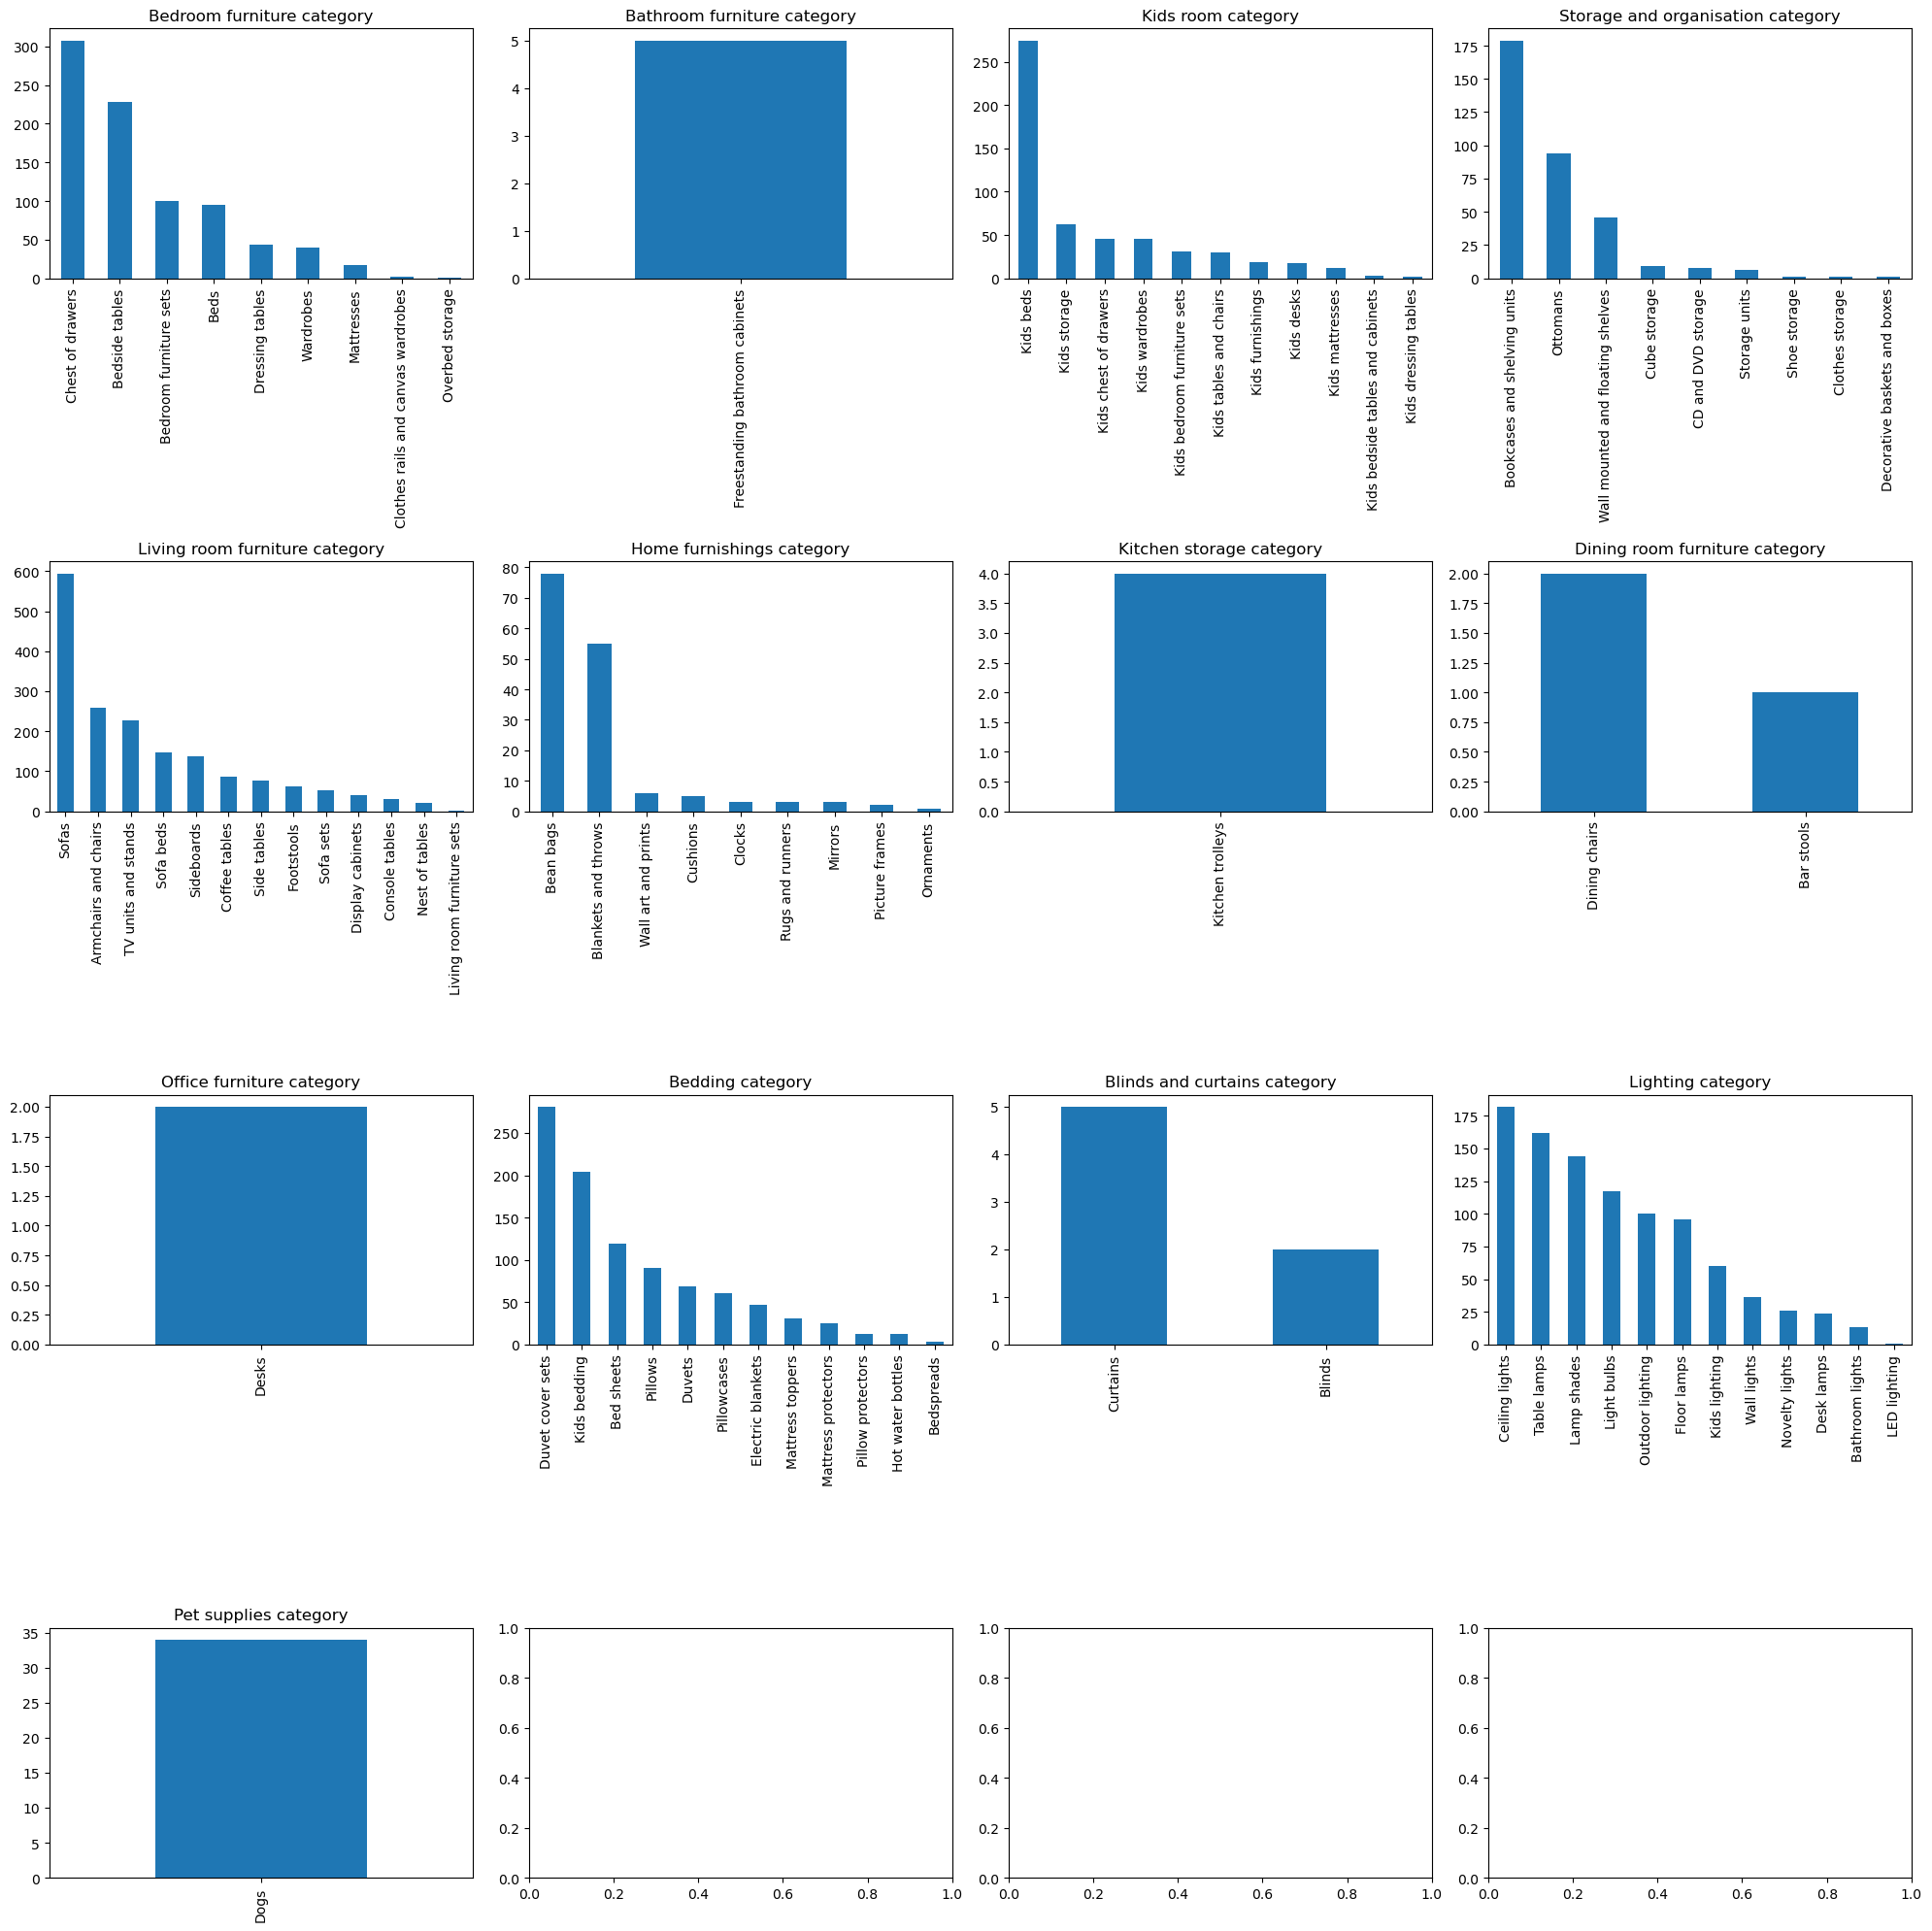

In [27]:
# Plotagem do gráfico com os valores para cada subcategoria
fig, axs = plt.subplots(4,4, figsize=(20,20))
axs = axs.flatten()

i=0
for l in range(len(category)):
    category[l].plot(kind='bar', ax=axs[i], x=category[l].columns[0], title=category[l].columns[0]).\
    set(xlabel=None)
    axs[i].legend().remove()
    i += 1

plt.tight_layout()
plt.show()

In [28]:
# Seleão das subcategorias que possuem apenas mais de 100 valores
category_100 = []

for i in range(len(category)):
    if category[i]['Product Type'].sum() > 100:
        results = category[i]
        category_100.append(results)

# Comparação para saber a quantidade original para a filtrada
print(f" DataFrames without filter = {len(category)}")
print(f" DataFrames with filter = {len(category_100)}")

 DataFrames without filter = 13
 DataFrames with filter = 7


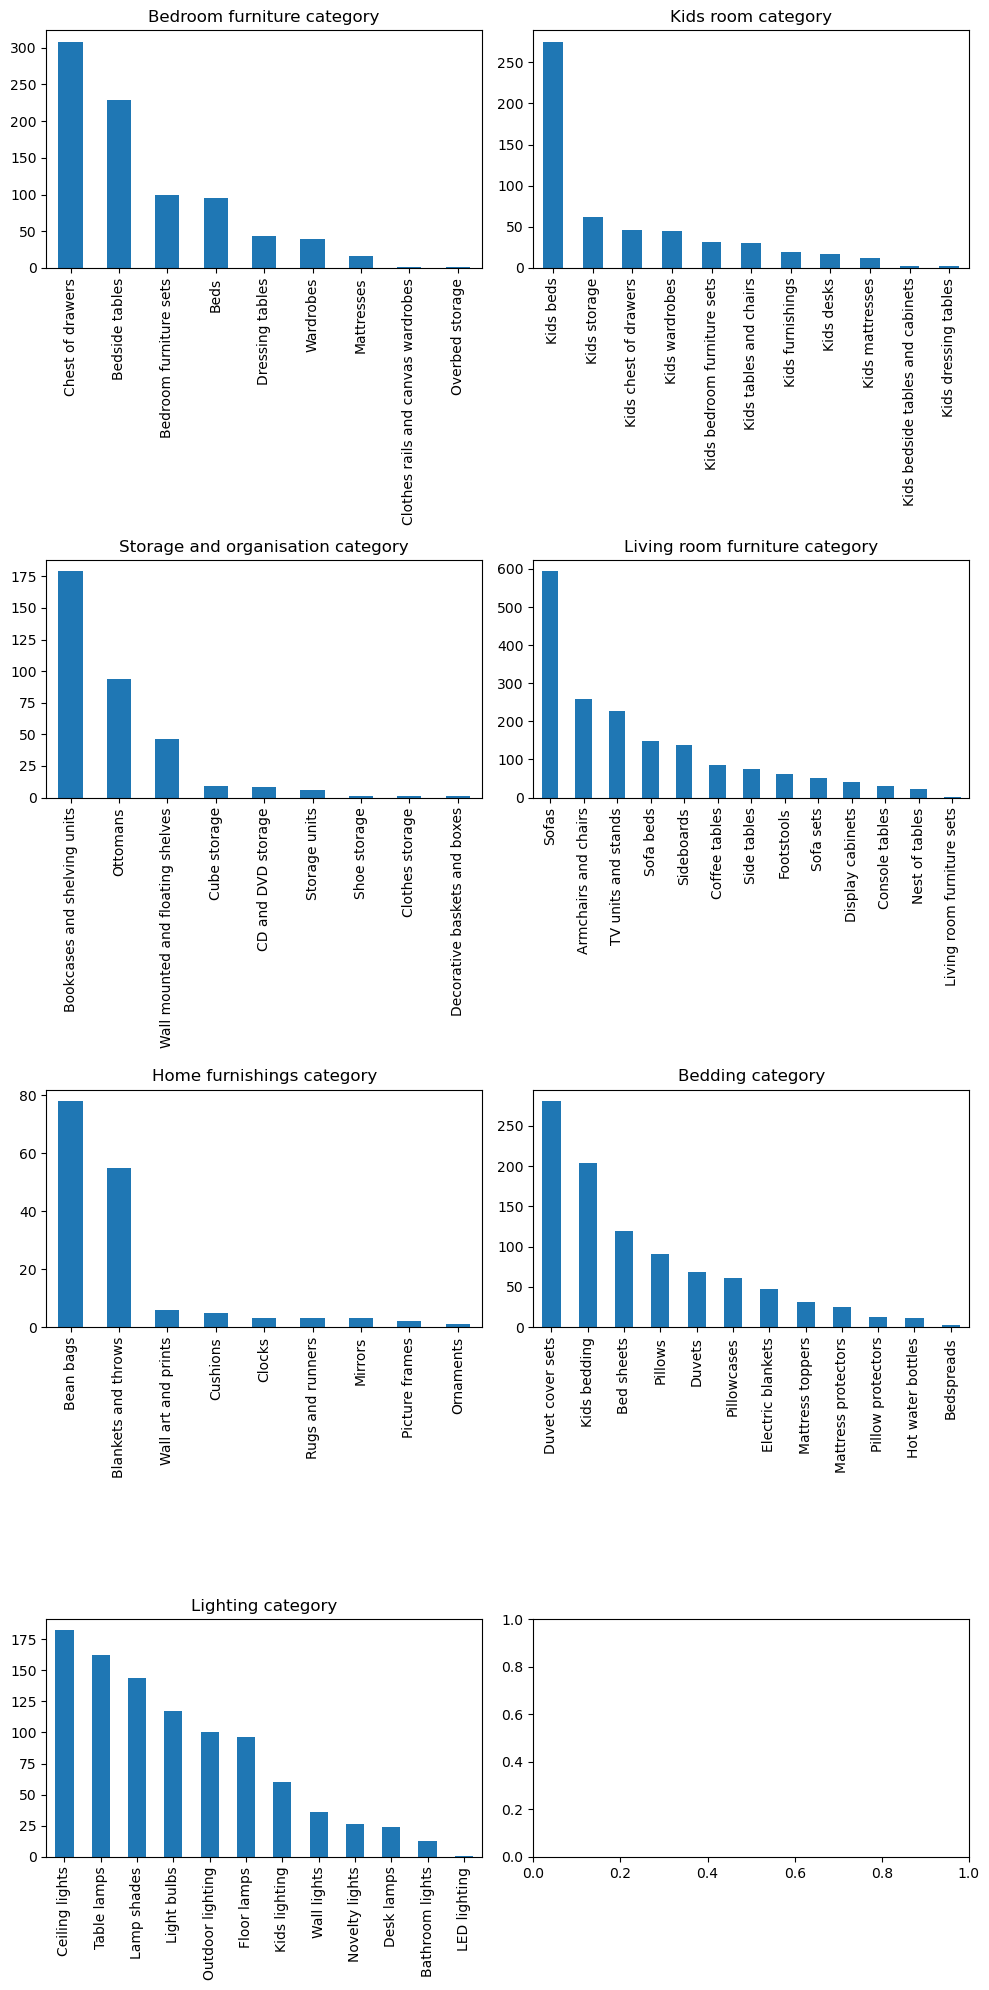

In [29]:
# Plotagem do novo Dataframe
fig, axs = plt.subplots(4,2, figsize=(10,20))
axs = axs.flatten()

i=0
for l in range(len(category_100)):
    category_100[l].plot(kind='bar', ax=axs[i], x=category_100[l].columns[0], title=category_100[l].columns[0]).\
    set(xlabel=None)
    axs[i].legend().remove()
    i += 1

plt.tight_layout()
plt.show()

In [30]:
# Análise específica da subcategoria com mais valores
living_room = category_100[3]
living_room_total = living_room['Product Type'].sum()
print(f'Total objects in Living Room category = {living_room_total}')
living_room

Total objects in Living Room category = 1738


,Living room furniture category,Product Type
0,Sofas,594
1,Armchairs and chairs,259
2,TV units and stands,228
3,Sofa beds,148
4,Sideboards,138
5,Coffee tables,86
6,Side tables,76
7,Footstools,63
8,Sofa sets,52
9,Display cabinets,41


In [31]:
# Filtrando novo dataframe com apenas a subcategoria com mais valores
living_room_df = home_furniture[home_furniture['Sub-Category'] == 'Living room furniture']
living_room_df

,Category,Sub-Category,Product Type,Product Line Item,Product Price
450,Home and furniture,Living room furniture,Side tables,Habitat Sylvie Side Table - Mirrored,83.3
467,Home and furniture,Living room furniture,Side tables,Frank Olsen Wireless Charging Side Table - Gre...,155.0
499,Home and furniture,Living room furniture,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
500,Home and furniture,Living room furniture,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
501,Home and furniture,Living room furniture,Side tables,Frank Olsen Elevate Smart Lamp Table - White,200.0
...,...,...,...,...,...
3235,Home and furniture,Living room furniture,Sofa beds,Habitat Kids Grey Stars Chair Bed,85.0
3236,Home and furniture,Living room furniture,Footstools,Habitat Elton the Elephant Kids Stool,65.0
3521,Home and furniture,Living room furniture,Footstools,Kaikoo Dottie Cotton Knitted Pod Footstool - Y...,55.0
3523,Home and furniture,Living room furniture,Footstools,Kaikoo Gentry Wool Pouffe - White,70.0


In [32]:
living_room_products = []

for i in living_room_df['Product Type'].unique():
    results = living_room_df[living_room_df['Product Type'] == i]
    results = results.loc[:,['Product Type', 'Product Line Item', 'Product Price']]
    living_room_products.append(results)
# Nos iremos analisar como a composição da subcategoria é composta
living_room_products[0]

,Product Type,Product Line Item,Product Price
450,Side tables,Habitat Sylvie Side Table - Mirrored,83.3
467,Side tables,Frank Olsen Wireless Charging Side Table - Gre...,155.0
499,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
500,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
501,Side tables,Frank Olsen Elevate Smart Lamp Table - White,200.0
...,...,...,...
2179,Side tables,GFW Presto Side Table - White & Oak,60.0
2180,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
2181,Side tables,Lloyd Pascal Rustica Side Table - Light Wood,100.0
2182,Side tables,Lloyd Pascal Radiance Side Table - Black & Gold,100.0


In [33]:
living_room_products[0]['Product Line Item'].unique()
# como há muitos produtos no catálogo, iremos criar um range de valores e agrupar os produtos por tal.

array(['Habitat Sylvie Side Table - Mirrored',
       'Frank Olsen Wireless Charging Side Table - Grey & White',
       'Frank Olsen Elevate Lamp Table - Grey',
       'Frank Olsen Elevate Smart Lamp Table - White',
       'Habitat Skandi Storage Side Table - Grey',
       'Habitat Sona Storage Side Table - Silver',
       'Habitat Sona Storage Side Table - Brass',
       'Habitat Mid Century Side Table - Walnut',
       'Habitat Single Folding Tray Table - Natural',
       'Argos Home New Verona Side Table - Light Wood Effect',
       'Habitat Loft Living C Shape End Table - Black',
       'Habitat End Table - Oak Effect', 'Habitat End Table - Black',
       'Habitat End Table - White',
       'Habitat Airo Metal Folding Table - Blue',
       'Habitat Airo Metal Folding Table - Black',
       'Habitat Airo Metal Folding Table - White',
       'Habitat Hazel Natural Rattan Side Table',
       'Habitat Drew Low Side Table - Bamboo',
       'Habitat Kayleigh Marble Side Table',
       'H

In [34]:
# Agrupamento da subcategoria pelo preço
living_room_products[0].groupby('Product Price')[['Product Type']].count().sort_values(by='Product Price', ascending=False)

,Product Type
Product Price,
200.0,4
155.0,2
120.0,4
100.0,2
95.0,2
90.0,2
85.0,4
83.3,2
80.0,4


In [35]:
# Fatiando o dataframe por 3 categorias baseado no range de valores
living_room_range = []


for i in range(len(living_room_products)):
    results_1 = living_room_products[i][(living_room_products[i]['Product Price'] >=0) & (living_room_products[i]['Product Price'] <= 50)]
    results_2 = living_room_products[i][(living_room_products[i]['Product Price'] >50) & (living_room_products[i]['Product Price'] <= 100)]
    results_3 = living_room_products[i][(living_room_products[i]['Product Price'] >100)]
    living_room_range.append(results_1)
    living_room_range.append(results_2)
    living_room_range.append(results_3)
    
# Range 0-50
living_room_range[1]

,Product Type,Product Line Item,Product Price
450,Side tables,Habitat Sylvie Side Table - Mirrored,83.3
2108,Side tables,Habitat Skandi Storage Side Table - Grey,56.0
2112,Side tables,Habitat Mid Century Side Table - Walnut,75.0
2125,Side tables,Habitat Hazel Natural Rattan Side Table,80.0
2128,Side tables,Habitat Kayleigh Marble Side Table,70.0
2133,Side tables,Habitat Pasadena Side Table - Natural,65.0
2135,Side tables,Habitat Rattan Side Table - Black,56.0
2136,Side tables,GFW Canyon Lamp Table - Oak,54.0
2138,Side tables,GFW Jakarta Cube Side Table - Mango Wood Effect,67.0
2140,Side tables,GFW Lancaster Side Table - Cream,58.0


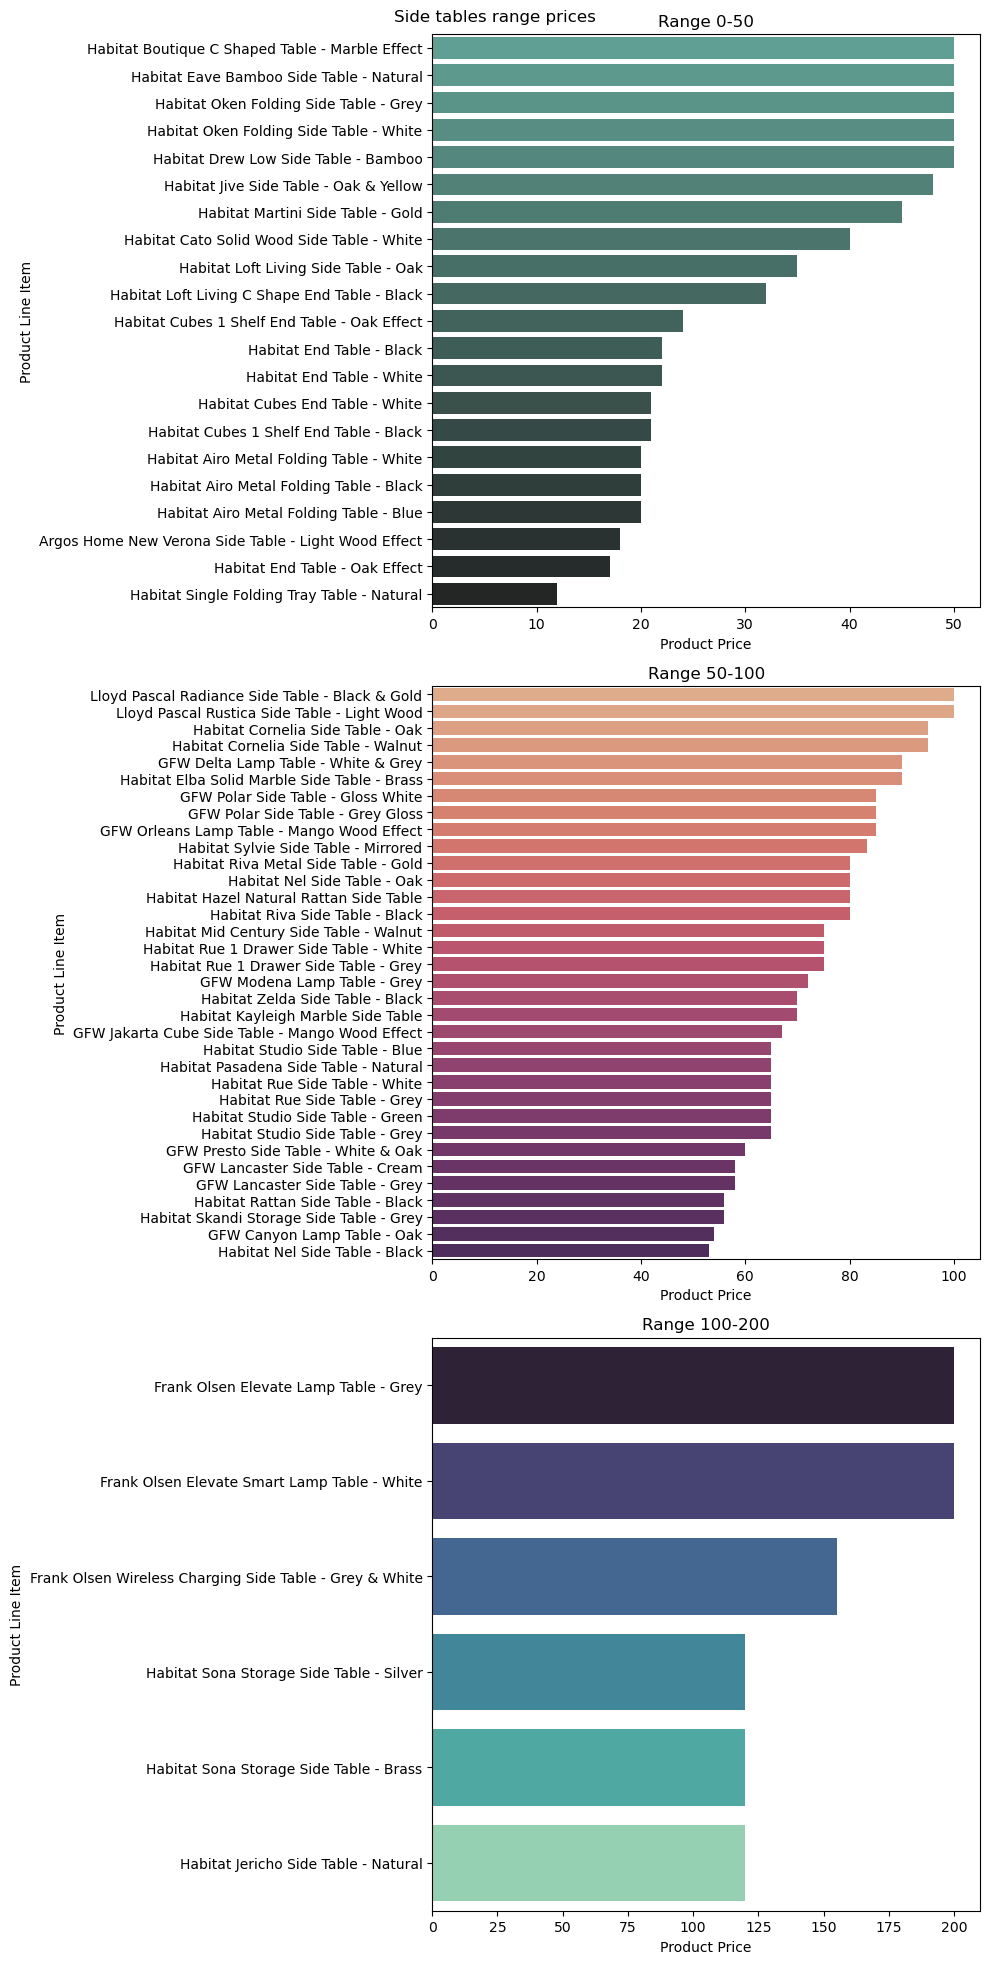

In [45]:
# Plotagem do gráfico com as divisões
sorted_50 = living_room_range[0].sort_values(by='Product Price', ascending=False)
sorted_100 = living_room_range[1].sort_values(by='Product Price', ascending=False)
sorted_200 = living_room_range[2].sort_values(by='Product Price', ascending=False)

fig, axs= plt.subplots(3,1, figsize=(10,20))
sns.barplot(data=sorted_50, y=sorted_50['Product Line Item'], x=sorted_50['Product Price'], palette='dark:#5A9_r', ax=axs[0]).set(title='Range 0-50')
sns.barplot(data=sorted_100, y=sorted_100['Product Line Item'], x=sorted_100['Product Price'], palette='flare',ax=axs[1]).set(title='Range 50-100')
sns.barplot(data=sorted_200, y=sorted_200['Product Line Item'], x=sorted_200['Product Price'], palette='mako',ax=axs[2]).set(title='Range 100-200')
plt.suptitle('Side tables range prices')
plt.tight_layout()
plt.show()